# 15 Minute Series: San Diego Analysis
---

*Cara Higashi, Robert Lopez, Joseph Sy, Giovanni Ramos Gutierrez*

## Data Import
---

### City Boundary

In [4]:
import geopandas as gpd
import warnings

warnings.simplefilter('ignore')

32466 entries

```
cPath = './data/cities/cb_2022_us_place_500k.shp'

cities = gpd.read_file(cpath, geometry='geometry')

sd = cities[(cities['NAME'] == 'San Diego') & (cities['STUSPS'] == 'CA')]

sd.to_file('./data/cities/San-Diego/sd.shp')
```

In [5]:
sdPath = './data/cities/san-diego/sd.shp'

In [6]:
sdBoundary = gpd.read_file(sdPath, geometry='geometry')

In [7]:
sdBoundary.shape

(1, 13)

In [8]:
from functions.crs_col import set_crs

set_crs(sdBoundary).head()

,STATEFP,PLACEFP,PLACENS,AFFGEOID,GEOID,NAME,NAMELSAD,STUSPS,STATE_NAME,LSAD,ALAND,AWATER,geometry
0,06,66000,02411782,1600000US0666000,0666000,San Diego,San Diego city,CA,California,25,844031824,120532755,"MULTIPOLYGON (((-116.93192 32.64961, -116.9314..."


<Axes: >

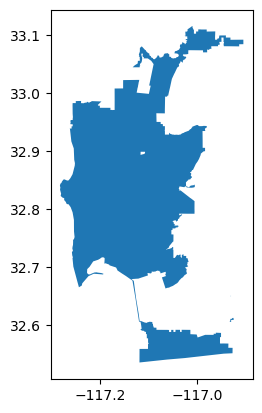

In [9]:
sdBoundary.plot()

### Census Tracts

In [10]:
from geosnap import DataStore

In [11]:
dataSets = DataStore('/srv/data/geosnap')

In [12]:
tracts = dataSets.acs('2021')

In [13]:
sdTracts = tracts[tracts['geoid'].str.startswith('06073')]

In [14]:
set_crs(sdTracts).head()

,geoid,n_mexican_pop,n_cuban_pop,n_puerto_rican_pop,n_russian_pop,n_italian_pop,n_german_pop,n_irish_pop,n_scandaniavian_pop,n_foreign_born_pop,...,p_poverty_rate,p_poverty_rate_over_65,p_poverty_rate_children,p_poverty_rate_white,p_poverty_rate_black,p_poverty_rate_hispanic,p_poverty_rate_native,p_poverty_rate_asian,geometry,year
10522,06073000100,228.0,0.0,21.0,45.0,117.0,34.0,35.0,0.0,277.0,...,1.623816,0.304465,0.000000,1.082544,0.00000,1.116373,0.0,0.0,"MULTIPOLYGON (((-117.19490 32.75278, -117.1947...",2021
10523,06073000201,40.0,11.0,0.0,13.0,101.0,65.0,112.0,0.0,216.0,...,6.323084,2.771763,0.000000,4.677350,0.00000,0.909485,0.0,0.0,"MULTIPOLYGON (((-117.17887 32.75765, -117.1779...",2021
10524,06073000202,431.0,0.0,59.0,78.0,233.0,150.0,66.0,0.0,879.0,...,4.217016,0.000000,0.123305,3.699137,0.00000,1.331689,0.0,0.0,"MULTIPOLYGON (((-117.18404 32.74571, -117.1838...",2021
10525,06073000301,396.0,0.0,19.0,0.0,21.0,83.0,53.0,0.0,439.0,...,17.155556,0.622222,2.444444,16.311111,0.00000,4.888889,0.0,0.0,"MULTIPOLYGON (((-117.16864 32.74897, -117.1684...",2021
10526,06073000302,526.0,0.0,66.0,13.0,70.0,121.0,132.0,0.0,199.0,...,7.102672,1.265823,0.000000,4.887482,2.21519,3.059072,0.0,0.0,"MULTIPOLYGON (((-117.16400 32.74091, -117.1640...",2021


In [15]:
sdTracts.columns.values

array(['geoid', 'n_mexican_pop', 'n_cuban_pop', 'n_puerto_rican_pop',
       'n_russian_pop', 'n_italian_pop', 'n_german_pop', 'n_irish_pop',
       'n_scandaniavian_pop', 'n_foreign_born_pop',
       'n_recent_immigrant_pop', 'n_naturalized_pop',
       'n_russian_born_pop', 'n_italian_born_pop', 'n_german_born_pop',
       'n_irish_born_pop', 'n_scandaniavian_born_pop',
       'n_total_housing_units', 'n_vacant_housing_units',
       'n_occupied_housing_units', 'n_owner_occupied_housing_units',
       'n_renter_occupied_housing_units',
       'n_housing_units_multiunit_structures_denom',
       'n_housing_units_multiunit_structures',
       'n_total_housing_units_sample', 'median_home_value',
       'median_contract_rent', 'n_occupied_housing_units_sample',
       'n_persons_under_18', 'n_persons_over_60', 'n_persons_over_75',
       'n_persons_over_15', 'n_persons_over_25', 'n_married',
       'n_widowed_divorced', 'n_total_families',
       'n_female_headed_families', 'n_nonhisp_wh

In [16]:
variables = ['n_total_pop', 'p_poverty_rate', 'median_household_income', 'per_capita_income', 
             'p_nonhisp_white_persons', 'p_nonhisp_black_persons','p_hispanic_persons', 
             'p_asian_persons']

In [17]:
sdVariables = sdTracts.loc[:, variables + ['geometry']]

In [18]:
csd = gpd.overlay(sdBoundary, sdVariables, how='identity')

In [19]:
csd.head()

,STATEFP,PLACEFP,PLACENS,AFFGEOID,GEOID,NAME,NAMELSAD,STUSPS,STATE_NAME,LSAD,...,AWATER,n_total_pop,p_poverty_rate,median_household_income,per_capita_income,p_nonhisp_white_persons,p_nonhisp_black_persons,p_hispanic_persons,p_asian_persons,geometry
0,06,66000,02411782,1600000US0666000,0666000,San Diego,San Diego city,CA,California,25,...,120532755.0,2956.0,1.623816,160990.0,96996.0,77.604871,0.000000,14.445196,3.958051,"POLYGON ((-117.19471 32.75301, -117.19413 32.7..."
1,06,66000,02411782,1600000US0666000,0666000,San Diego,San Diego city,CA,California,25,...,120532755.0,2309.0,6.323084,94629.0,100047.0,82.503248,0.389779,5.326981,5.586834,"POLYGON ((-117.17797 32.75765, -117.17706 32.7..."
2,06,66000,02411782,1600000US0666000,0666000,San Diego,San Diego city,CA,California,25,...,120532755.0,4116.0,4.217016,99651.0,66060.0,71.865889,0.485909,17.322643,6.219631,"POLYGON ((-117.18383 32.74608, -117.18376 32.7..."
3,06,66000,02411782,1600000US0666000,0666000,San Diego,San Diego city,CA,California,25,...,120532755.0,2250.0,17.155556,82788.0,74564.0,65.111111,2.311111,19.288889,5.377778,"POLYGON ((-117.16840 32.74897, -117.16768 32.7..."
4,06,66000,02411782,1600000US0666000,0666000,San Diego,San Diego city,CA,California,25,...,120532755.0,3042.0,7.102672,71712.0,66441.0,73.668639,1.873767,21.071663,2.629849,"POLYGON ((-117.16400 32.74132, -117.16400 32.7..."


<Axes: >

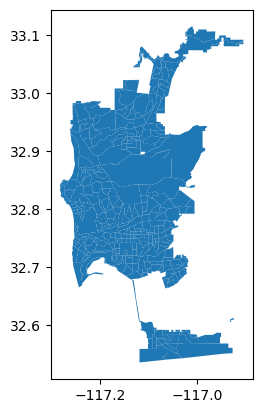

In [20]:
csd.plot()

### Schools

102268 entries
```
schPath = './data/schools/EDGE_GEOCODE_PUBLICSCH_2223.shp'

schools = gpd.read_file(schPath, geometry='geometry')

set_crs(schools)

sdSchools = schools[(schools['STATE'] == 'CA') & (schools['CITY'] == 'San Diego')]

sdSchools.to_file('./data/schools/sdSch/sdSchools.shp')
```

In [21]:
sdsPath = './data/schools/sdSch/sdSchools.shp'

In [22]:
sds = gpd.read_file(sdsPath, geometry='geometry')

In [23]:
sds.shape

(288, 26)

In [24]:
from functions.dup_col import duplicate_columns

In [26]:
duplicate_columns(csd, sds)

Duplicate column names found:
- geometry
- NAME


In [27]:
from functions.rn_col import rename_column

In [28]:
rename_column(sds, old='NAME', new='SCHOOL_NAME')

sds.head()

,NCESSCH,LEAID,SCHOOL_NAME,OPSTFIPS,STREET,CITY,STATE,ZIP,STFIP,CNTY,...,CBSATYPE,CSA,NMCSA,NECTA,NMNECTA,CD,SLDL,SLDU,SCHOOLYEAR,geometry
0,060013811406,0600138,San Diego County ROP,06,6401 Linda Vista Rd.,San Diego,CA,92111,06,06073,...,1,N,N,N,N,0653,06079,06039,2022-2023,POINT (-117.17986 32.76963)
1,060146814198,0601468,America's Finest Charter,06,730 45th St.,San Diego,CA,92102,06,06073,...,1,N,N,N,N,0651,06080,06040,2022-2023,POINT (-117.09805 32.71284)
2,060148312630,0601483,San Diego Global Vision Academy,06,3430 Sch St.,San Diego,CA,92116,06,06073,...,1,N,N,N,N,0653,06078,06039,2022-2023,POINT (-117.11906 32.76264)
3,060150313795,0601503,Elevate,06,2285 Murray Ridge Rd.,San Diego,CA,92123,06,06073,...,1,N,N,N,N,0653,06079,06039,2022-2023,POINT (-117.14416 32.78656)
4,060151511386,0601515,High Tech High Media Arts,06,2230 Truxtun Rd.,San Diego,CA,92106,06,06073,...,1,N,N,N,N,0652,06078,06039,2022-2023,POINT (-117.21984 32.73461)


In [29]:
sdsJoin = gpd.sjoin(sds, csd, how='left', predicate='within').drop(columns=['index_right'])

sdsJoin.head()

,NCESSCH,LEAID,SCHOOL_NAME,OPSTFIPS,STREET,CITY,STATE,ZIP,STFIP,CNTY,...,ALAND,AWATER,n_total_pop,p_poverty_rate,median_household_income,per_capita_income,p_nonhisp_white_persons,p_nonhisp_black_persons,p_hispanic_persons,p_asian_persons
0,060013811406,0600138,San Diego County ROP,06,6401 Linda Vista Rd.,San Diego,CA,92111,06,06073,...,844031824.0,120532755.0,5189.0,17.190210,81372.0,40661.0,45.789169,3.064174,35.825785,13.702062
1,060146814198,0601468,America's Finest Charter,06,730 45th St.,San Diego,CA,92102,06,06073,...,844031824.0,120532755.0,4800.0,23.729167,61473.0,20874.0,6.062500,14.333333,65.916667,11.166667
2,060148312630,0601483,San Diego Global Vision Academy,06,3430 Sch St.,San Diego,CA,92116,06,06073,...,844031824.0,120532755.0,3269.0,10.033649,70758.0,43277.0,47.629244,2.324870,37.503824,5.445090
3,060150313795,0601503,Elevate,06,2285 Murray Ridge Rd.,San Diego,CA,92123,06,06073,...,844031824.0,120532755.0,4013.0,4.684774,149132.0,53831.0,52.628956,6.653377,12.758535,23.398953
4,060151511386,0601515,High Tech High Media Arts,06,2230 Truxtun Rd.,San Diego,CA,92106,06,06073,...,844031824.0,120532755.0,4290.0,3.840246,96413.0,42400.0,50.093240,5.384615,21.561772,16.013986


<Axes: >

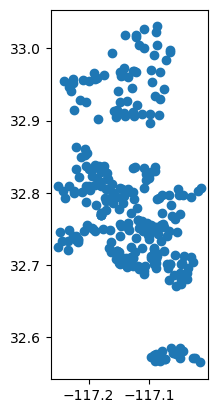

In [30]:
sdsJoin.plot()

### Hospitals

8013 entries
~~~
hospitalPath = './data/hospitals/Hospitals.shp'

usHospitals = gpd.read_file(hospitalPath, geometry='geometry')

set_crs(usHospitals).head()

sdHospitals = usHospitals[(usHospitals['STATE'] == 'CA') & (usHospitals['CITY'] == 'SAN DIEGO')]

sdHospitals.to_file('./data/hospitals/sdHosp/sdHospitals.shp')
~~~

In [33]:
sdhPath = './data/hospitals/sdHosp/sdHospitals.shp'

In [34]:
sdh = gpd.read_file(sdhPath, geometry='geometry')

In [35]:
sdh.shape

(22, 33)

In [36]:
duplicate_columns(csd, sdh)

Duplicate column names found:
- geometry
- NAME


In [37]:
rename_column(sdh, old='NAME', new='HOSPITAL_NAME')

In [38]:
sdhJoin = gpd.sjoin(sdh, csd, how='left', predicate='within').drop(columns=['index_right'])

sdhJoin.head()

,OBJECTID,ID,HOSPITAL_NAME,ADDRESS,CITY,STATE,ZIP,ZIP4,TELEPHONE,TYPE,...,ALAND,AWATER,n_total_pop,p_poverty_rate,median_household_income,per_capita_income,p_nonhisp_white_persons,p_nonhisp_black_persons,p_hispanic_persons,p_asian_persons
0,554,0036992123,RADY CHILDREN'S HOSPITAL - SAN DIEGO,3020 CHILDRENS WAY,SAN DIEGO,CA,92123,4223,(858) 966-3001,CHILDREN,...,844031824.0,120532755.0,5438.0,14.921031,91583.0,34681.0,44.814270,9.893343,25.818316,14.417065
1,555,0042492123,SHARP MEMORIAL HOSPITAL,7901 FROST ST,SAN DIEGO,CA,92123,2701,(858) 939-3400,GENERAL ACUTE CARE,...,844031824.0,120532755.0,5438.0,14.921031,91583.0,34681.0,44.814270,9.893343,25.818316,14.417065
2,557,0020092120,KAISER FOUNDATION HOSPITAL - ZION,4647 ZION AVE,SAN DIEGO,CA,92120,2507,(619) 528-6295,GENERAL ACUTE CARE,...,844031824.0,120532755.0,3426.0,8.406305,79847.0,42949.0,60.507881,6.100409,21.949796,4.407472
3,565,0002692128,AURORA SAN DIEGO,11878 AVENUE OF INDUSTRY,SAN DIEGO,CA,92128,3423,(858) 487-3200,PSYCHIATRIC,...,844031824.0,120532755.0,4452.0,3.981154,96711.0,47220.0,40.700809,2.628032,24.123989,28.099730
4,566,0042392111,SHARP MCDONALD CENTER,7989 LINDA VISTA RD,SAN DIEGO,CA,92111,5106,(858) 576-1200,REHABILITATION,...,844031824.0,120532755.0,3153.0,14.490818,71991.0,31771.0,42.530923,3.425309,23.025690,21.249604


<Axes: >

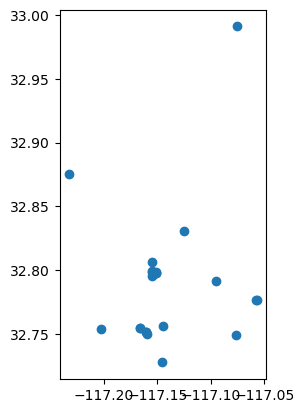

In [39]:
sdhJoin.plot()

### SD Clinics

6738 entries

~~~
clinicsPath = './data/health_sd/OSHPD_Healthcare_Facilities.geojson'

clinics = gpd.read_file(clinicsPath, geometry='geometry')

set_crs(clinics)

sdClinics = clinics[clinics['city'] == 'San Diego']

sdClinics.to_file('./data/health_sd/sdClin/sdClinics.geojson')
~~~

In [42]:
sdcPath = './data/health_sd/sdClin/sdClinics.geojson'

In [43]:
sdc = gpd.read_file(sdcPath, geometry='geometry')

In [44]:
duplicate_columns(sdc, csd)

Duplicate column names found:
- geometry


In [45]:
sdcJoin = gpd.sjoin(sdc, csd, how='left', predicate='within').drop(columns=['index_right'])

sdcJoin.head()

,oshpd_id,facility_name,facility_url,latitude,longitude,facility_level_desc,city,updated,zip_code,er_service_level_desc,...,ALAND,AWATER,n_total_pop,p_poverty_rate,median_household_income,per_capita_income,p_nonhisp_white_persons,p_nonhisp_black_persons,p_hispanic_persons,p_asian_persons
0,406374435,Advanced Home Health San Diego Inc,https://oshpd.ca.gov/facility/advanced-home-he...,32.893820,-117.131550,Parent Facility,San Diego,2015-06-18 00:00:00+00:00,92126,Not Applicable,...,844031824.0,120532755.0,7160.0,6.033520,85899.0,38869.0,25.642458,3.645251,33.100559,35.041899
1,306374409,San Diego Children's Dental Clinic,https://oshpd.ca.gov/facility/san-diego-childr...,32.798493,-117.152151,Parent Facility,San Diego,2008-04-08 00:00:00+00:00,92123,Not Applicable,...,844031824.0,120532755.0,5438.0,14.921031,91583.0,34681.0,44.814270,9.893343,25.818316,14.417065
2,306374018,St. Vincent De Paul Village Family Health Center,https://oshpd.ca.gov/facility/st-vincent-de-pa...,32.705757,-117.149890,Parent Facility,San Diego,1987-12-01 00:00:00+00:00,92101,Not Applicable,...,844031824.0,120532755.0,2198.0,47.704316,21109.0,15157.0,39.990901,16.196542,38.034577,3.594177
3,206370747,"Mission Hills Health Care, Inc.",https://oshpd.ca.gov/facility/mission-hills-he...,32.750330,-117.158790,Parent Facility,San Diego,1967-01-16 00:00:00+00:00,92103,Not Applicable,...,844031824.0,120532755.0,3607.0,5.704996,79336.0,61583.0,56.057666,4.657610,21.264208,14.582756
4,306371285,Comprehensive Health Center - Metro,https://oshpd.ca.gov/facility/comprehensive-he...,32.701160,-117.125850,Parent Facility,San Diego,1977-08-01 00:00:00+00:00,92113,Not Applicable,...,844031824.0,120532755.0,4603.0,11.418610,50583.0,21104.0,4.540517,6.517489,85.357376,3.193569


<Axes: >

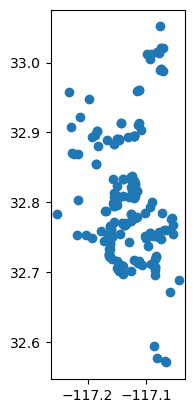

In [46]:
sdcJoin.plot()

In [47]:
sdcJoin.shape

(180, 38)

In [48]:
duplicate_columns(sdcJoin, sdhJoin)

Duplicate column names found:
- p_hispanic_persons
- p_nonhisp_black_persons
- p_poverty_rate
- STATEFP
- p_nonhisp_white_persons
- GEOID
- geometry
- LSAD
- AWATER
- per_capita_income
- NAME
- ALAND
- n_total_pop
- PLACEFP
- AFFGEOID
- STATE_NAME
- median_household_income
- STUSPS
- NAMELSAD
- p_asian_persons
- PLACENS


In [51]:
from functions.no_dup import unique_columns

In [52]:
unique_columns(sdcJoin, sdhJoin)

Unique column names found:
- TRAUMA
- BEDS
- ID
- facility_status_desc
- STATE
- address_1
- zip_code
- NAICS_DESC
- COUNTRY
- ST_FIPS
- OWNER
- er_service_level_desc
- license_category_desc
- STATUS
- NAICS_CODE
- ZIP
- COUNTYFIPS
- SOURCEDATE
- number_of_beds
- TYPE
- ADDRESS
- WEBSITE
- facility_name
- OBJECTID
- LATITUDE
- address_2
- oshpd_id
- STATE_ID
- city
- TTL_STAFF
- HELIPAD
- facility_level_desc
- SOURCE
- HOSPITAL_NAME
- updated
- TELEPHONE
- longitude
- VAL_METHOD
- ALT_NAME
- VAL_DATE
- POPULATION
- facility_url
- FID
- state
- latitude
- ZIP4
- CITY
- LONGITUDE
- COUNTY


In [53]:
sdcJoin['updated'] = sdcJoin['updated'].astype(str)

In [54]:
facilities = ['facility_name', 'facility_level_desc']

In [56]:
healthFacilities = sdc.loc[:, facilities + ['geometry']]

healthFacilities.head()

,facility_name,facility_level_desc,geometry
0,Advanced Home Health San Diego Inc,Parent Facility,POINT (-117.13155 32.89382)
1,San Diego Children's Dental Clinic,Parent Facility,POINT (-117.15215 32.79849)
2,St. Vincent De Paul Village Family Health Center,Parent Facility,POINT (-117.14989 32.70576)
3,"Mission Hills Health Care, Inc.",Parent Facility,POINT (-117.15879 32.75033)
4,Comprehensive Health Center - Metro,Parent Facility,POINT (-117.12585 32.70116)


In [57]:
print(healthFacilities.geom_type.unique())

['Point']


In [58]:
print(sdhJoin.geom_type.unique())

['Point']


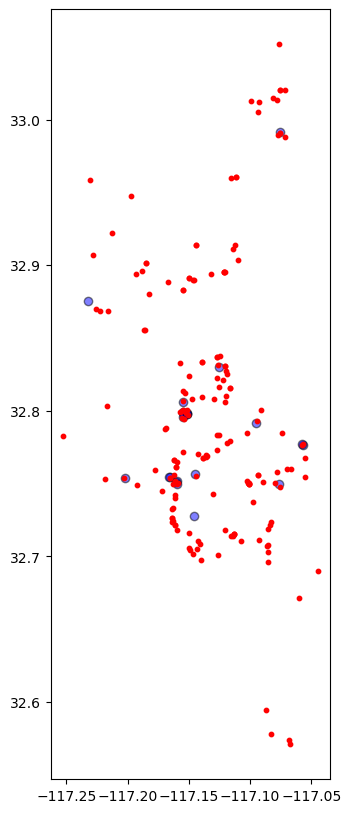

In [59]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 10))
sdhJoin.plot(ax=ax, color='blue', edgecolor='k', alpha=0.5)
healthFacilities.plot(ax=ax, color='red', markersize=10)
plt.show()

In [60]:
healthCare = gpd.overlay(sdhJoin, healthFacilities, how='union')

healthCare.head()

,OBJECTID,ID,HOSPITAL_NAME,ADDRESS,CITY,STATE,ZIP,ZIP4,TELEPHONE,TYPE,...,p_poverty_rate,median_household_income,per_capita_income,p_nonhisp_white_persons,p_nonhisp_black_persons,p_hispanic_persons,p_asian_persons,facility_name,facility_level_desc,geometry
0,554.0,0036992123,RADY CHILDREN'S HOSPITAL - SAN DIEGO,3020 CHILDRENS WAY,SAN DIEGO,CA,92123,4223,(858) 966-3001,CHILDREN,...,14.921031,91583.0,34681.0,44.814270,9.893343,25.818316,14.417065,NaN,NaN,POINT (-117.15130 32.79796)
1,555.0,0042492123,SHARP MEMORIAL HOSPITAL,7901 FROST ST,SAN DIEGO,CA,92123,2701,(858) 939-3400,GENERAL ACUTE CARE,...,14.921031,91583.0,34681.0,44.814270,9.893343,25.818316,14.417065,NaN,NaN,POINT (-117.15447 32.79928)
2,557.0,0020092120,KAISER FOUNDATION HOSPITAL - ZION,4647 ZION AVE,SAN DIEGO,CA,92120,2507,(619) 528-6295,GENERAL ACUTE CARE,...,8.406305,79847.0,42949.0,60.507881,6.100409,21.949796,4.407472,NaN,NaN,POINT (-117.09516 32.79156)
3,565.0,0002692128,AURORA SAN DIEGO,11878 AVENUE OF INDUSTRY,SAN DIEGO,CA,92128,3423,(858) 487-3200,PSYCHIATRIC,...,3.981154,96711.0,47220.0,40.700809,2.628032,24.123989,28.099730,NaN,NaN,POINT (-117.07532 32.99118)
4,566.0,0042392111,SHARP MCDONALD CENTER,7989 LINDA VISTA RD,SAN DIEGO,CA,92111,5106,(858) 576-1200,REHABILITATION,...,14.490818,71991.0,31771.0,42.530923,3.425309,23.025690,21.249604,NaN,NaN,POINT (-117.15448 32.80601)


In [62]:
healthCare.shape

(202, 55)

### SD Transit

In [63]:
ts_path = './data/sd_transit/transit_stops_datasd.geojson'

In [64]:
sd_ts = gpd.read_file(ts_path, geometry='geometry')

In [65]:
set_crs(sd_ts).head()

,objectid,stop_uid,stop_id,stop_code,stop_name,stop_lat,stop_lon,stop_agncy,wheelchair,intersec,stop_place,parent_sta,lat,lng,geometry
0,1,MTS_11tbro,11tbro,0,11th Ave & Broadway,32.716268,-117.154649,MTS,0,None,None,None,32.716263,-117.154637,POINT (-117.15464 32.71626)
1,2,MTS_12tS,12tS,0,12th & Imperial Station,32.706002,-117.153378,MTS,0,None,None,None,32.705997,-117.153366,POINT (-117.15337 32.70600)
2,3,MTS_imtS,imtS,0,12th & Imperial Station Bayside,32.705229,-117.154318,MTS,0,None,None,None,32.705224,-117.154306,POINT (-117.15431 32.70522)
3,4,MTS_imp12,imp12,0,12th & Imperial Transit Center,32.705685,-117.152875,MTS,0,None,None,None,32.705680,-117.152863,POINT (-117.15286 32.70568)
4,5,MTS_24tS,24tS,0,24th Street Station,32.661854,-117.108017,MTS,0,None,None,None,32.661849,-117.108005,POINT (-117.10801 32.66185)


In [66]:
sd_ts.stop_agncy.unique()

array(['MTS', 'NCTD'], dtype=object)

In [67]:
sd_bs = sd_ts[sd_ts['stop_agncy'] == 'MTS']

sd_bs.head()

,objectid,stop_uid,stop_id,stop_code,stop_name,stop_lat,stop_lon,stop_agncy,wheelchair,intersec,stop_place,parent_sta,lat,lng,geometry
0,1,MTS_11tbro,11tbro,0,11th Ave & Broadway,32.716268,-117.154649,MTS,0,None,None,None,32.716263,-117.154637,POINT (-117.15464 32.71626)
1,2,MTS_12tS,12tS,0,12th & Imperial Station,32.706002,-117.153378,MTS,0,None,None,None,32.705997,-117.153366,POINT (-117.15337 32.70600)
2,3,MTS_imtS,imtS,0,12th & Imperial Station Bayside,32.705229,-117.154318,MTS,0,None,None,None,32.705224,-117.154306,POINT (-117.15431 32.70522)
3,4,MTS_imp12,imp12,0,12th & Imperial Transit Center,32.705685,-117.152875,MTS,0,None,None,None,32.705680,-117.152863,POINT (-117.15286 32.70568)
4,5,MTS_24tS,24tS,0,24th Street Station,32.661854,-117.108017,MTS,0,None,None,None,32.661849,-117.108005,POINT (-117.10801 32.66185)


In [68]:
csd_geo = csd.geometry

In [69]:
csd_gdf = gpd.GeoDataFrame(geometry=csd_geo)

In [70]:
csd_stops = gpd.overlay(sd_bs, csd_gdf, how='intersection')

csd_stops.head()

,objectid,stop_uid,stop_id,stop_code,stop_name,stop_lat,stop_lon,stop_agncy,wheelchair,intersec,stop_place,parent_sta,lat,lng,geometry
0,1,MTS_11tbro,11tbro,0,11th Ave & Broadway,32.716268,-117.154649,MTS,0,None,None,None,32.716263,-117.154637,POINT (-117.15464 32.71626)
1,25,MTS_ccoS,ccoS,0,City College Station,32.716307,-117.154235,MTS,0,None,None,None,32.716302,-117.154223,POINT (-117.15422 32.71630)
2,26,MTS_citcol,citcol,0,City College Trolley Station,32.715820,-117.153939,MTS,0,None,None,None,32.715815,-117.153927,POINT (-117.15393 32.71581)
3,77,MTS_marpar,marpar,0,Park & Market Trolley Station,32.711537,-117.153993,MTS,0,None,None,None,32.711532,-117.153981,POINT (-117.15398 32.71153)
4,104,MTS_12049,12049,12049,10th Av & A St,32.718577,-117.155691,MTS,2,F-S/B,10thb,None,32.718573,-117.155679,POINT (-117.15568 32.71857)


<Axes: >

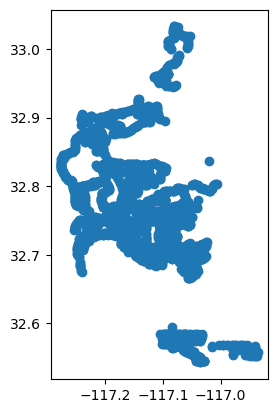

In [71]:
csd_stops.plot()

In [57]:
csds_sj = gpd.sjoin(csd_stops, csd, how='inner', predicate='within').drop(columns=['index_right'])

csds_sj.head()

,objectid,stop_uid,stop_id,stop_code,stop_name,stop_lat,stop_lon,stop_agncy,wheelchair,intersec,...,ALAND,AWATER,n_total_pop,p_poverty_rate,median_household_income,per_capita_income,p_nonhisp_white_persons,p_nonhisp_black_persons,p_hispanic_persons,p_asian_persons
0,1,MTS_11tbro,11tbro,0,11th Ave & Broadway,32.716268,-117.154649,MTS,0,None,...,844031824.0,120532755.0,4706.0,27.921802,53082.0,51972.0,48.491288,12.643434,26.583085,7.033574
1,25,MTS_ccoS,ccoS,0,City College Station,32.716307,-117.154235,MTS,0,None,...,844031824.0,120532755.0,4706.0,27.921802,53082.0,51972.0,48.491288,12.643434,26.583085,7.033574
2,26,MTS_citcol,citcol,0,City College Trolley Station,32.715820,-117.153939,MTS,0,None,...,844031824.0,120532755.0,4706.0,27.921802,53082.0,51972.0,48.491288,12.643434,26.583085,7.033574
3,77,MTS_marpar,marpar,0,Park & Market Trolley Station,32.711537,-117.153993,MTS,0,None,...,844031824.0,120532755.0,4706.0,27.921802,53082.0,51972.0,48.491288,12.643434,26.583085,7.033574
4,104,MTS_12049,12049,12049,10th Av & A St,32.718577,-117.155691,MTS,2,F-S/B,...,844031824.0,120532755.0,4706.0,27.921802,53082.0,51972.0,48.491288,12.643434,26.583085,7.033574


In [58]:
csds_sj.columns.values

array(['objectid', 'stop_uid', 'stop_id', 'stop_code', 'stop_name',
       'stop_lat', 'stop_lon', 'stop_agncy', 'wheelchair', 'intersec',
       'stop_place', 'parent_sta', 'lat', 'lng', 'geometry', 'STATEFP',
       'PLACEFP', 'PLACENS', 'AFFGEOID', 'GEOID', 'NAME', 'NAMELSAD',
       'STUSPS', 'STATE_NAME', 'LSAD', 'ALAND', 'AWATER', 'n_total_pop',
       'p_poverty_rate', 'median_household_income', 'per_capita_income',
       'p_nonhisp_white_persons', 'p_nonhisp_black_persons',
       'p_hispanic_persons', 'p_asian_persons'], dtype=object)

### San Diego Grocery Stores

In [59]:
bus_path = './data/sd_grocery/business_sites.csv'

In [60]:
bus_df = pd.read_csv(bus_path)

In [61]:
bus_df.columns.values

array(['id', 'apn', 'bcccode', 'ownnam1', 'ownnam2', 'ownnam3', 'careof',
       'strnum', 'strfra', 'strdir', 'strnam', 'strtyp', 'strsrm', 'city',
       'state', 'contry', 'zipcd1', 'zipcd2', 'loccod', 'locnum',
       'locfra', 'locdir', 'locnam', 'loctyp', 'locsrm', 'loccit',
       'bustype', 'point_x', 'point_y', 'geometry'], dtype=object)

In [62]:
from shapely import wkt

In [63]:
bus_df['geometry'] = bus_df['geometry'].apply(wkt.loads)

sdcg = gpd.GeoDataFrame(bus_df, geometry='geometry')

In [64]:
type(sdcg)

geopandas.geodataframe.GeoDataFrame

In [65]:
set_crs(sdcg)

,id,apn,bcccode,ownnam1,ownnam2,ownnam3,careof,strnum,strfra,strdir,...,locfra,locdir,locnam,loctyp,locsrm,loccit,bustype,point_x,point_y,geometry
0,0,7602110600,298,AT&T SERVICES INC,NaN,NaN,C/O PROPERTY TAX DEPT,909.0,NaN,NaN,...,NaN,NaN,11TH,ST,NaN,CAMP PENDLETON,MISC PROFESSIONAL,6.210715e+06,2.026933e+06,POINT (-117.39762 33.22365)
1,1,7600801704,2,OCEANSIDE SMALL CRAFT HARBOR,DISTRICT,MARINA INN OCEANSIDE SUITES,NaN,2008.0,NaN,N,...,NaN,N,HARBOR,DR,B,OCEANSIDE,PUBLIC AGENCY,6.210725e+06,2.021698e+06,POINT (-117.39740 33.20926)
2,2,7600801100,41,OCEANSIDE YACHT CLUB INC,NaN,NaN,NaN,1950.0,NaN,N,...,NaN,N,HARBOR,DR,NaN,OCEANSIDE,CLUBS - SOCIAL/SERVI,6.210790e+06,2.022669e+06,POINT (-117.39722 33.21193)
3,3,7600802400,313,ALOHA RESTAURANTS INC,DBA JOLLY ROGER RESTAURANT,#119,ATTN STEVE MOYER,204.0,NaN,NaN,...,NaN,N,HARBOR,DR,NaN,OCEANSIDE,CAFE,6.210974e+06,2.022894e+06,POINT (-117.39663 33.21255)
4,4,7600801000,492,YEARLEY SHARON&MONTE,DBA YEARLEY SAILBOATS,NaN,NaN,1850.0,NaN,N,...,NaN,N,HARBOR,DR,B,OCEANSIDE,BOAT&SUPPLIERS,6.211157e+06,2.023119e+06,POINT (-117.39604 33.21318)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101808,101808,9500000000,314,MAL HEE LEE,DBA I SUSHI,NaN,NaN,945.0,NaN,NaN,...,NaN,NaN,OTAY LAKES,RD,N,CHULA VISTA,CAFE-FAST FOOD,6.333138e+06,1.813900e+06,POINT (-116.99235 32.64122)
101809,101809,9500000000,391,WIEBER WILLIAM,DBA BOSNS LOCKER THE,NaN,NaN,946.0,NaN,NaN,...,NaN,NaN,INDUSTRIAL,BLVD,NaN,CHULA VISTA,MACHINE SHOP,6.303025e+06,1.804280e+06,POINT (-117.08991 32.61416)
101810,101810,9500000000,295,RADIATION ONCOLOGY SOUTH BAY,LLC,NaN,NaN,310.0,NaN,NaN,...,NaN,NaN,LANE,AVE,B,CHULA VISTA,DOCTOR/OSTEOPA/CHIRO,6.342555e+06,1.817407e+06,POINT (-116.96184 32.65104)
101811,101811,9500000000,298,PACIFIC RAILWAY ENTERPRISES,INC,NaN,NaN,3560.0,NaN,NaN,...,NaN,NaN,CHESAPEAKE,DR,420,SAN DIEGO,MISC PROFESSIONAL,6.293307e+06,1.883807e+06,POINT (-117.12363 32.83250)


<Axes: >

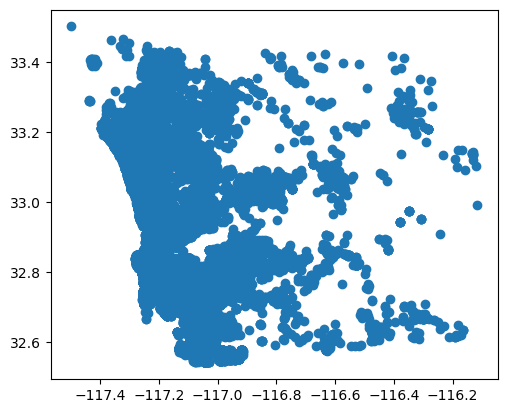

In [66]:
sdcg.plot()

In [67]:
sdst = sdcg[(sdcg['state'] == 'CA') & (sdcg['city'] == 'SAN DIEGO')]

sdst.head()

,id,apn,bcccode,ownnam1,ownnam2,ownnam3,careof,strnum,strfra,strdir,...,locfra,locdir,locnam,loctyp,locsrm,loccit,bustype,point_x,point_y,geometry
10,10,7600801500,63,ACE PARKING MANAGEMENT INC,LOT 270-271-272,SEE 6080250000,NaN,645.0,NaN,NaN,...,NaN,N,HARBOR,DR,NaN,OCEANSIDE,AUTO PARKING,6.211995e+06,2.020975e+06,POINT (-117.39322 33.20731)
18,18,7600800200,131,SAN DIEGO COUNTY CREDIT UNION,KIOSK #D068,NaN,NaN,6545.0,NaN,NaN,...,NaN,S,HARBOR,DR,NaN,OCEANSIDE,CREDIT UNION EXEMPT,6.212949e+06,2.019838e+06,POINT (-117.39006 33.20422)
43,43,1503540600,261,CONWAY JAMES M&LOIS R TRS,NaN,NaN,NaN,8515.0,NaN,NaN,...,NaN,S,PACIFIC,ST,NaN,OCEANSIDE,APARTMENTS,6.213620e+06,2.018388e+06,POINT (-117.38781 33.20025)
91,91,1501810700,261,SANDAGE FAMILY EXEMPTION TRUST,33810,GRETLER BILL&MARY E,C/O PACIFIC PALM APARTMENTS,0.0,NaN,NaN,...,NaN,S,CLEVELAND,ST,NaN,OCEANSIDE,APARTMENTS,6.214970e+06,2.017402e+06,POINT (-117.38337 33.19758)
112,112,1472620900,261,NORTHERN TRUST BANK OF,CALIFORNIA TR EVANS FRANK E JR,NaN,NaN,4370.0,NaN,NaN,...,NaN,S,PACIFIC,ST,NaN,OCEANSIDE,APARTMENTS,6.215262e+06,2.015812e+06,POINT (-117.38236 33.19322)


In [68]:
duplicate_columns(sdst, csd)

Duplicate column names found:
- geometry


In [69]:
sdst.columns.values

array(['id', 'apn', 'bcccode', 'ownnam1', 'ownnam2', 'ownnam3', 'careof',
       'strnum', 'strfra', 'strdir', 'strnam', 'strtyp', 'strsrm', 'city',
       'state', 'contry', 'zipcd1', 'zipcd2', 'loccod', 'locnum',
       'locfra', 'locdir', 'locnam', 'loctyp', 'locsrm', 'loccit',
       'bustype', 'point_x', 'point_y', 'geometry'], dtype=object)

In [70]:
sdg = gpd.sjoin(sdst, csd, how='inner', predicate='within')

sdg.head()

,id,apn,bcccode,ownnam1,ownnam2,ownnam3,careof,strnum,strfra,strdir,...,ALAND,AWATER,n_total_pop,p_poverty_rate,median_household_income,per_capita_income,p_nonhisp_white_persons,p_nonhisp_black_persons,p_hispanic_persons,p_asian_persons
6511,6511,3505911300,44,SOCIAL SERVICE LEAGUE OF,LA JOLLA,DBA LEAGUE HOUSE,SEE 6836620000,7457.0,NaN,NaN,...,844031824.0,120532755.0,3645.0,6.314613,89058.0,77890.0,87.379973,0.329218,7.105624,3.676269
6659,6659,3505911100,298,20 20 EYEGLASS REPAIR,NaN,NaN,NaN,7472.0,NaN,NaN,...,844031824.0,120532755.0,3645.0,6.314613,89058.0,77890.0,87.379973,0.329218,7.105624,3.676269
6678,6678,3513813400,261,P A D PROPERTIES GROUP LP,NaN,NaN,NaN,7964.0,NaN,NaN,...,844031824.0,120532755.0,3645.0,6.314613,89058.0,77890.0,87.379973,0.329218,7.105624,3.676269
6762,6762,3513833500,261,BROWAR MATHEW S&NANCY A TRS,NaN,NaN,C/O SAN DIEGO PROPERTY MGMT,0.0,NaN,NaN,...,844031824.0,120532755.0,3645.0,6.314613,89058.0,77890.0,87.379973,0.329218,7.105624,3.676269
6771,6771,3505921900,37,BIKRAM YOGA,NaN,NaN,NaN,565.0,NaN,NaN,...,844031824.0,120532755.0,3645.0,6.314613,89058.0,77890.0,87.379973,0.329218,7.105624,3.676269


<Axes: >

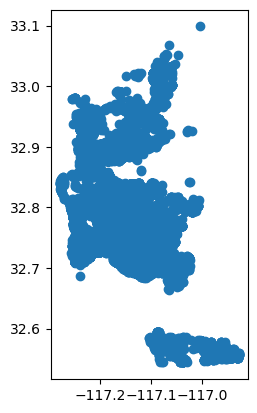

In [71]:
sdg.plot()

In [72]:
sdgs = sdg[sdg['bustype'] == 'GROCERY STORES']

sdgs.head()

,id,apn,bcccode,ownnam1,ownnam2,ownnam3,careof,strnum,strfra,strdir,...,ALAND,AWATER,n_total_pop,p_poverty_rate,median_household_income,per_capita_income,p_nonhisp_white_persons,p_nonhisp_black_persons,p_hispanic_persons,p_asian_persons
13435,13435,4482722900,445,ELENI INC,DBA OLIVE TREE MARKET PLACE,NaN,NaN,4805.0,NaN,NaN,...,844031824.0,120532755.0,3525.0,12.585227,94847.0,57296.0,85.219858,0.000000,10.156028,1.049645
12244,12244,4235820900,445,IBRAHIM HABIB&AMEL,DBA LITTLE SAMS MARKET,NaN,NaN,3756.0,NaN,NaN,...,844031824.0,120532755.0,2350.0,12.468085,78144.0,56947.0,90.723404,4.042553,0.808511,2.297872
12942,12942,4236641100,445,MAKDESI MARY,DBA COAST MARKET,NaN,NaN,3206.0,NaN,NaN,...,844031824.0,120532755.0,1719.0,5.468296,97843.0,66516.0,63.525305,9.831297,20.535195,4.072135
13072,13072,4237150200,445,YOUSSIF JOSEPH,DBA MISSION MARKET,NaN,NaN,2885.0,NaN,NaN,...,844031824.0,120532755.0,1719.0,5.468296,97843.0,66516.0,63.525305,9.831297,20.535195,4.072135
12963,12963,4480923700,445,NEWPORT TAFT INC,DBA NEWPORT FARMS MARKET,NaN,NaN,5004.0,NaN,NaN,...,844031824.0,120532755.0,3178.0,8.370044,74524.0,60362.0,73.662681,4.908748,9.754563,4.814349


<Axes: >

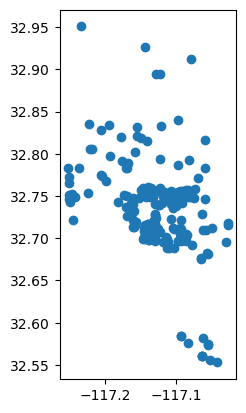

In [73]:
sdgs.plot()

### San Diego Parks

In [74]:
park_path = './data/sd_parks/parks_datasd.geojson'

In [75]:
sd_park = gpd.read_file(park_path, geometry='geometry')

<Axes: >

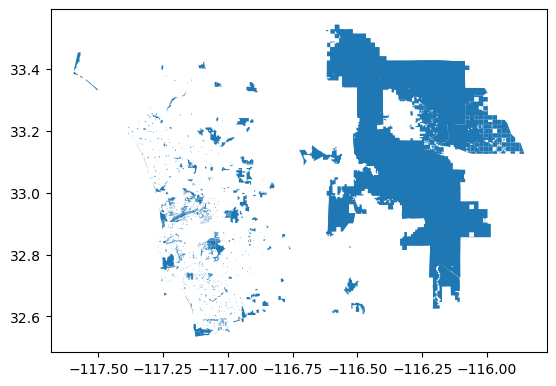

In [76]:
sd_park.plot()

In [77]:
set_crs(sd_park).head()

,objectid,name,alias,gis_acres,park_type,location,owner,source_id,source,source_dt,src_notes,geometry
0,1,South Carlsbad SB,South Carlsbad State Beach,115.895878,State,None,State Parks,652,State Parks,0416,None,"MULTIPOLYGON (((-117.32891 33.12345, -117.3287..."
1,2,Torrey Pines SB,Torrey Pines State Beach,67.294309,State,None,State Parks,631,State Parks,0416,None,"POLYGON ((-117.26147 32.93883, -117.26144 32.9..."
2,3,Ruocco Park,Ruocco Park,3.312526,Local,"585 Harbor Ln, San Diego. California",SDUPD,None,SDUPD,0416,None,"POLYGON ((-117.17129 32.71138, -117.17129 32.7..."
3,4,Tuna Harbor Park,Tuna Harbor Park,0.639035,Local,"700 North Harbor Dr, San Diego. California",SDUPD,None,SDUPD,0416,None,"POLYGON ((-117.17272 32.71171, -117.17270 32.7..."
4,5,San Diego Bayfront Park,San Diego Bayfront Park,3.669272,Local,"One Park Boulevard, San Diego. California",SDUPD,None,SDUPD,0416,None,"MULTIPOLYGON (((-117.16044 32.70438, -117.1600..."


<Axes: >

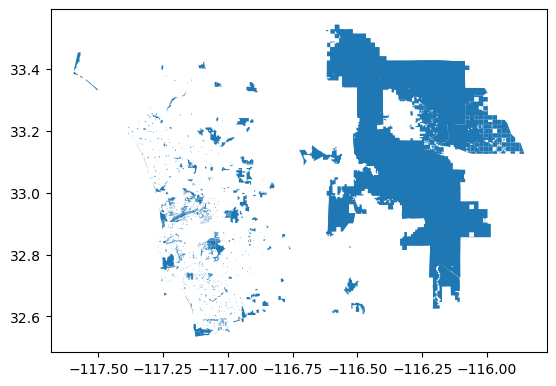

In [78]:
sd_park.plot()

In [79]:
sd_park.park_type.unique()

array(['State', 'Local', 'Other', 'Open Space', 'Regional', 'National',
       'Historic'], dtype=object)

In [80]:
sdp = gpd.sjoin(sd_park, csd, how='inner', predicate='within')

sdp.head()

,objectid,name,alias,gis_acres,park_type,location,owner,source_id,source,source_dt,...,ALAND,AWATER,n_total_pop,p_poverty_rate,median_household_income,per_capita_income,p_nonhisp_white_persons,p_nonhisp_black_persons,p_hispanic_persons,p_asian_persons
2,3,Ruocco Park,Ruocco Park,3.312526,Local,"585 Harbor Ln, San Diego. California",SDUPD,None,SDUPD,0416,...,844031824.0,120532755.0,4238.0,10.665408,136645.0,84526.0,67.036338,3.350637,7.810288,20.292591
32,33,Lane Field Park,Lane Field Park,1.570610,Local,"1009 North Harbor Dr, San Diego. California",SDUPD,None,SDUPD,0416,...,844031824.0,120532755.0,4238.0,10.665408,136645.0,84526.0,67.036338,3.350637,7.810288,20.292591
544,545,PANTOJA NP,Pantoja Park,2.148412,Local,"524 West G Street, 92118",City of San Diego,None,City of San Diego,0516,...,844031824.0,120532755.0,4238.0,10.665408,136645.0,84526.0,67.036338,3.350637,7.810288,20.292591
14,15,Los Penasquitos Marsh NP,Los Penasquitos Marsh Nature Nature Preserve,213.470371,State,None,State Parks,640,State Parks,0416,...,844031824.0,120532755.0,1788.0,38.031320,65089.0,40845.0,49.384787,2.348993,10.738255,26.006711
61,62,Los Penasquitos Marsh NP,Los Penasquitos Marsh Nature Nature Preserve,199.665838,State,None,State Parks,640,State Parks,0416,...,844031824.0,120532755.0,1788.0,38.031320,65089.0,40845.0,49.384787,2.348993,10.738255,26.006711


In [1]:
sdp.plot()

NameError: name 'sdp' is not defined

### San Diego Places of Worship

In [82]:
plc_path = './data/sd_worship/Places.geojson'

In [83]:
sd_plc = gpd.read_file(plc_path, geometry='geometry')

In [84]:
set_crs(sd_plc).head()

,OBJECTID,NAME,ADDR,CITYNM,TYPE,DESCRIP,FEA_SRC,COMMUNITYNM,SCALE,EDIT_REASON,CREATOR,CREATED,EDITOR,EDITED,Primary_Display,Zipcode,Longitude,Latitude,geometry
0,1,COUNTY OF SAN DIEGO-SOCIAL SERVICES,3355 MISSION AVE,Oceanside,GovernmentFacility,None,PLACES_OLD_FeatureToPoint2,Oceanside,24000.0,1,None,NaT,LWEDLEY,2022-04-11 21:35:34+00:00,1,92054.0,-117.341449,33.217268,POINT (-117.34145 33.21727)
1,2,CITY OF OCEANSIDE OPERATIONS CENTER,4925 OCEANSIDE BLVD.,Oceanside,GovernmentFacility,None,PLACES_OLD_FeatureToPoint2,Oceanside,24000.0,1,None,NaT,LWEDLEY,2022-04-11 21:35:34+00:00,1,92056.0,-117.266665,33.217821,POINT (-117.26667 33.21782)
2,3,Park 1200 I & II,1122-4Melrose Dr N.,Vista,IndustrialStructure,None,PLACES_OLD_FeatureToPoint2,Vista,24000.0,1,None,NaT,LWEDLEY,2022-04-11 21:35:34+00:00,1,92083.0,-117.256516,33.217679,POINT (-117.25652 33.21768)
3,4,Oceanside Airport Business Park,572-62 Airport Rd,Oceanside,BusinessCenter,None,PLACES_OLD_FeatureToPoint2,Oceanside,24000.0,1,None,NaT,LWEDLEY,2022-04-11 21:35:34+00:00,1,92058.0,-117.352739,33.216756,POINT (-117.35274 33.21676)
4,5,Hobie Cat,4925 Oceanside Blvd,Oceanside,BusinessCenter,None,PLACES_OLD_; GOOGLEMAPS,Ivey Ran/Ran Del Oro,24000.0,1,None,NaT,LWEDLEY,2022-04-11 21:35:34+00:00,1,92056.0,-117.269119,33.217236,POINT (-117.26912 33.21724)


In [85]:
sd_plc.TYPE.unique()

array(['GovernmentFacility', 'IndustrialStructure', 'BusinessCenter',
       'ShoppingCenter', 'OfficeBuilding', 'Building', 'Casino',
       'EntertainmentFacility', 'ResidentialStructure',
       'HigherEducationFacility', 'EnergyFacility', 'CommunityPoint',
       'MajorEmployer', 'PostOffice', 'Motel', 'Zoo', 'AdultDayCare',
       'Hospital', 'Undetermined', 'CorrectionalInstitution',
       'MilitaryBase', 'RecreationalFacility', 'Museum', 'ICE',
       'ReligiousStructure_C', 'School', 'TopographicFeature', 'Park',
       'Trail', 'Spring', 'Well', 'WaterFeature', 'Bay', 'Mine', 'Dam',
       'Mountain', 'HistoricalSite', 'Island', 'PopulatedPlace', 'Camp',
       'Farm', 'GolfCourse', 'Library', 'Cemetery', 'AmusementPark',
       'ReligiousStructure_B', 'MarineFeature', 'Reservoir', 'Bridge',
       'MileMarker', 'Gate', 'Tower', 'Medical', 'Waste',
       'CommunityCenter', 'Exit', 'Airport', 'RestArea', 'Beach',
       'IndianReservation', 'ParkingLot', 'WaterTreatment', 'Pi

In [86]:
ri_variables = ['ReligiousStructure_C', 'ReligiousStructure_B', 'ReligiousStructure',
                'ReligiousStructure_M', 'ReligiousStructure_H', 'ReligiousStructure_J']

In [87]:
sdcri = sd_plc[sd_plc['TYPE'].isin(ri_variables)]

sdcri.head()

,OBJECTID,NAME,ADDR,CITYNM,TYPE,DESCRIP,FEA_SRC,COMMUNITYNM,SCALE,EDIT_REASON,CREATOR,CREATED,EDITOR,EDITED,Primary_Display,Zipcode,Longitude,Latitude,geometry
1511,1512,Calvary Church of Alpine,2267 Victoria Dr,S.D. County,ReligiousStructure_C,A Building For Public Christian Worship,PLACE_NAMES; PARCELS_ALL,Alpine,24000.0,1,None,NaT,LWEDLEY,2022-04-11 21:35:34+00:00,1,91901.0,-116.766700,32.837557,POINT (-116.76670 32.83756)
1512,1513,Community Church of Alpine,2225 Victoria Dr,S.D. County,ReligiousStructure_C,A Building For Public Christian Worship,PARCELS_ALL; BUSINESS_SITES,Alpine,24000.0,1,None,NaT,LWEDLEY,2022-04-11 21:35:34+00:00,1,91901.0,-116.766398,32.836380,POINT (-116.76640 32.83638)
1525,1526,Temple of Christ Church,726 GRAND AV,S.D. County,ReligiousStructure_C,A Building For Public Christian Worship,PLACE_NAMES; BUSINESS_SITES,Spring Valley,24000.0,1,None,NaT,LWEDLEY,2022-04-11 21:35:34+00:00,1,91977.0,-116.997939,32.710443,POINT (-116.99794 32.71044)
1595,1596,The Universal Church,1136 E 18th St,National City,ReligiousStructure_C,A Building For Public Christian Worship,PLACE_NAMES; BUSINESS_SITES,National City,24000.0,1,None,NaT,LWEDLEY,2022-04-11 21:35:34+00:00,1,91950.0,-117.091430,32.670336,POINT (-117.09143 32.67034)
1660,1661,Apostolic Assembly of the Faith in Christ Church,530 Main Ave,S.D. County,ReligiousStructure_C,A Building For Public Christian Worship,PLACE_NAMES; GOOGLEMAPS,Fallbrook,24000.0,1,None,NaT,LWEDLEY,2022-04-11 21:35:34+00:00,1,92028.0,-117.251616,33.386248,POINT (-117.25162 33.38625)


In [88]:
duplicate_columns(sdcri, csd)

Duplicate column names found:
- geometry
- NAME


In [89]:
rename_column(sdcri, old='NAME', new='CHURCH NAME')

sdcri.head()

,OBJECTID,CHURCH NAME,ADDR,CITYNM,TYPE,DESCRIP,FEA_SRC,COMMUNITYNM,SCALE,EDIT_REASON,CREATOR,CREATED,EDITOR,EDITED,Primary_Display,Zipcode,Longitude,Latitude,geometry
1511,1512,Calvary Church of Alpine,2267 Victoria Dr,S.D. County,ReligiousStructure_C,A Building For Public Christian Worship,PLACE_NAMES; PARCELS_ALL,Alpine,24000.0,1,None,NaT,LWEDLEY,2022-04-11 21:35:34+00:00,1,91901.0,-116.766700,32.837557,POINT (-116.76670 32.83756)
1512,1513,Community Church of Alpine,2225 Victoria Dr,S.D. County,ReligiousStructure_C,A Building For Public Christian Worship,PARCELS_ALL; BUSINESS_SITES,Alpine,24000.0,1,None,NaT,LWEDLEY,2022-04-11 21:35:34+00:00,1,91901.0,-116.766398,32.836380,POINT (-116.76640 32.83638)
1525,1526,Temple of Christ Church,726 GRAND AV,S.D. County,ReligiousStructure_C,A Building For Public Christian Worship,PLACE_NAMES; BUSINESS_SITES,Spring Valley,24000.0,1,None,NaT,LWEDLEY,2022-04-11 21:35:34+00:00,1,91977.0,-116.997939,32.710443,POINT (-116.99794 32.71044)
1595,1596,The Universal Church,1136 E 18th St,National City,ReligiousStructure_C,A Building For Public Christian Worship,PLACE_NAMES; BUSINESS_SITES,National City,24000.0,1,None,NaT,LWEDLEY,2022-04-11 21:35:34+00:00,1,91950.0,-117.091430,32.670336,POINT (-117.09143 32.67034)
1660,1661,Apostolic Assembly of the Faith in Christ Church,530 Main Ave,S.D. County,ReligiousStructure_C,A Building For Public Christian Worship,PLACE_NAMES; GOOGLEMAPS,Fallbrook,24000.0,1,None,NaT,LWEDLEY,2022-04-11 21:35:34+00:00,1,92028.0,-117.251616,33.386248,POINT (-117.25162 33.38625)


In [90]:
csdri = gpd.sjoin(sdcri, csd, how='inner', predicate='within')

csdri.head()

,OBJECTID,CHURCH NAME,ADDR,CITYNM,TYPE,DESCRIP,FEA_SRC,COMMUNITYNM,SCALE,EDIT_REASON,...,ALAND,AWATER,n_total_pop,p_poverty_rate,median_household_income,per_capita_income,p_nonhisp_white_persons,p_nonhisp_black_persons,p_hispanic_persons,p_asian_persons
1661,1662,Apostolic Faith Garden of Prayer Church,6540 Brooklyn Ave,San Diego,ReligiousStructure_C,A Building For Public Christian Worship,PLACE_NAMES; BUSINESS_SITES,Encanto,24000.0,1,...,844031824.0,120532755.0,5456.0,19.621311,56324.0,26916.0,6.414956,13.251466,75.146628,3.170821
4552,4553,Encanto Southern Baptist Church,6020 Akins Ave,San Diego,ReligiousStructure_C,A Building For Public Christian Worship,PLACE_NAMES; BUSINESS_SITES,Encanto,24000.0,1,...,844031824.0,120532755.0,5456.0,19.621311,56324.0,26916.0,6.414956,13.251466,75.146628,3.170821
4624,4625,Grace Missionary Baptist Church,6328 Brooklyn Ave,San Diego,ReligiousStructure_C,A Building For Public Christian Worship,BUSINESS_SITES; PARCELS_ALL,Encanto,24000.0,1,...,844031824.0,120532755.0,5456.0,19.621311,56324.0,26916.0,6.414956,13.251466,75.146628,3.170821
13610,13611,Shiloh Temple Apostolic Church,5842 Market St,San Diego,ReligiousStructure_C,A Building For Public Christian Worship,PLACE_NAMES; BUSINESS_SITES,Emerald Hills,24000.0,1,...,844031824.0,120532755.0,5456.0,19.621311,56324.0,26916.0,6.414956,13.251466,75.146628,3.170821
17894,17895,2nd Iglesia Apostolica de la Fe En Cristo Jesus,5863 Market St,San Diego,ReligiousStructure_C,None,BUSINESS_SITES; GOOGLEMAPS,Encanto,NaN,1,...,844031824.0,120532755.0,5456.0,19.621311,56324.0,26916.0,6.414956,13.251466,75.146628,3.170821


In [91]:
csdri.dtypes

OBJECTID                                 int64
CHURCH NAME                             object
ADDR                                    object
CITYNM                                  object
TYPE                                    object
DESCRIP                                 object
FEA_SRC                                 object
COMMUNITYNM                             object
SCALE                                  float64
EDIT_REASON                              int64
CREATOR                                 object
CREATED                    datetime64[ns, UTC]
EDITOR                                  object
EDITED                     datetime64[ns, UTC]
Primary_Display                          int64
Zipcode                                float64
Longitude                              float64
Latitude                               float64
geometry                              geometry
index_right                              int64
STATEFP                                 object
PLACEFP      

In [92]:
csdri[['CREATED', 'EDITED']] = csdri[['CREATED', 'EDITED']].astype(str)

In [93]:
csdri.explore()

## Spatial Analysis
---

In [94]:
import os
import pandana as pdna
if not os.path.exists('41740.h5'):
    import quilt3 as q3
    b = q3.Bucket("s3://spatial-ucr")
    b.fetch("osm/metro_networks_8k/41740.h5", "./41740.h5")
sd_network = pdna.Network.from_hdf5("41740.h5")

100%|██████████| 29.2M/29.2M [00:06<00:00, 4.42MB/s]


Generating contraction hierarchies with 32 threads.
Setting CH node vector of size 332554
Setting CH edge vector of size 522484
Range graph removed 143094 edges of 1044968
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


In [95]:
from geosnap.analyze import isochrones_from_gdf

### SD Schools Isochrones

In [96]:
school_iso = isochrones_from_gdf(sds_sj, threshold=1600, network=sd_network)

<Axes: >

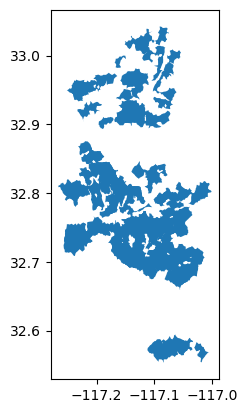

In [97]:
school_iso.plot()

In [98]:
sid = school_iso.dissolve()

In [99]:
sid['school_services'] = 1

In [100]:
import matplotlib.pyplot as plt

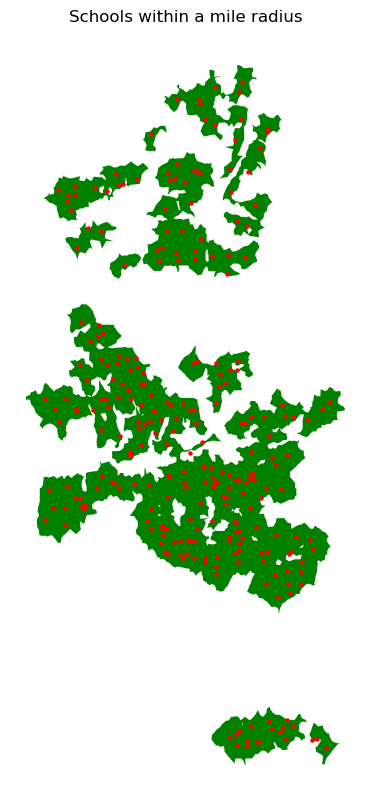

In [101]:
f, ax = plt.subplots(figsize=(12, 10))

sid.plot(color='green', ax=ax)

sds_sj.plot(ax=ax, color='red', markersize=5)

plt.title('Schools within a mile radius')

ax.axis('off')

plt.show()

### SD Hospital Isochrones

In [102]:
hospital_iso = isochrones_from_gdf(sdh_sj, threshold=1600, network=sd_network)

In [103]:
hid = hospital_iso.dissolve()

In [104]:
hid['hospital_services'] = 1

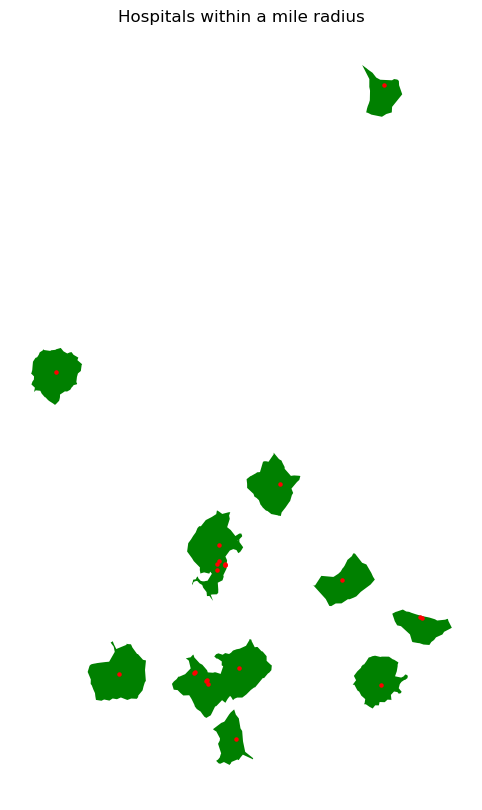

In [105]:
f, ax = plt.subplots(figsize=(12, 10))

hid.plot(color='green', ax=ax)

sdh_sj.plot(ax=ax, color='red', markersize=5)

plt.title('Hospitals within a mile radius')

ax.axis('off')

plt.show()

### SD Bus Stop Isochrones

- sdbs_iso = isochrones_from_gdf(csds_sj, threshold=1600, network=sd_network)
- bsd = sdbs_iso.dissolve()
- bsd.to_file('./data/sd_transit_iso/Bus-Stops/bid.shp')

In [106]:
bsic_path = './data/sd_transit/Isochrones/bsid.shp'

In [107]:
bsic = gpd.read_file(bsic_path, geometry='geometry')

bsic.head()

,distance,geometry
0,1600,"MULTIPOLYGON (((-117.24112 32.67052, -117.2411..."


In [108]:
bsic['busstop_services'] = 1

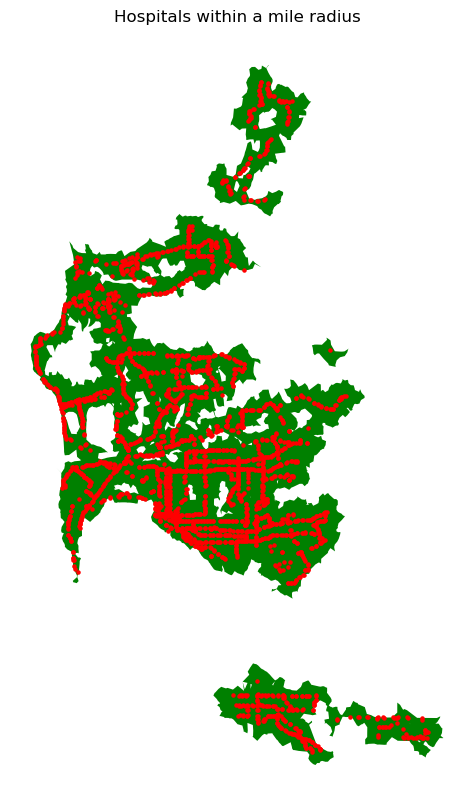

In [109]:
f, ax = plt.subplots(figsize=(12, 10))

bsic.plot(color='green', ax=ax)

csds_sj.plot(ax=ax, color='red', markersize=5)

plt.title('Hospitals within a mile radius')

ax.axis('off')

plt.show()

### SD Grocery Store Isochrones

- sdgs_iso = isochrones_from_gdf(sdgs, threshold=1600, network=sd_network)
- gsid = sdgs_iso.dissolve()
- gsid.to_file('./data/sd_grocery/Isochrones/gsid.shp')

In [110]:
gsic_path = './data/sd_grocery/Isochrones/gsid.shp'

In [111]:
gsic = gpd.read_file(gsic_path, geometry='geometry')

gsic.head()

,distance,geometry
0,1600,"MULTIPOLYGON (((-117.16911 32.70663, -117.1695..."


In [112]:
gsic['grocerystore_services'] = 1

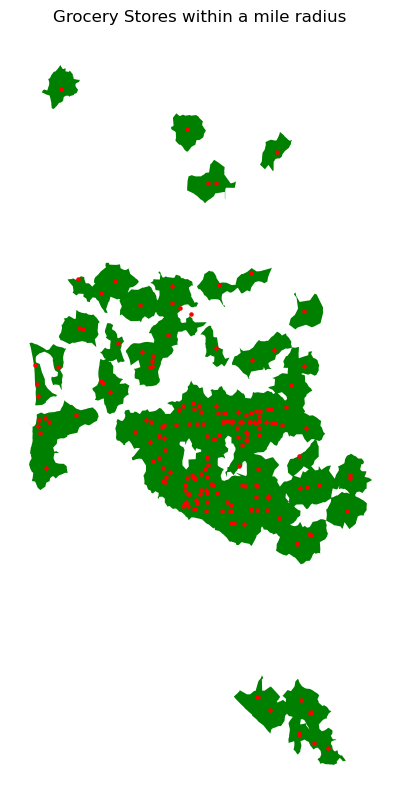

In [113]:
f, ax = plt.subplots(figsize=(12, 10))

gsic.plot(color='green', ax=ax)

sdgs.plot(ax=ax, color='red', markersize=5)

plt.title('Grocery Stores within a mile radius')

ax.axis('off')

plt.show()

### SD Parks Isochrones

- sdp_iso = isochrones_from_gdf(sdp, threshold=1600, network=sd_network)
- pid = sdp_iso.dissolve()
- pid.to_file('./data/sd_parks/Isochrones/pid.shp')

In [114]:
pic_path = './data/sd_parks/Isochrones/pid.shp'

In [115]:
pic = gpd.read_file(pic_path, geometry='geometry')

pic.head()

,distance,geometry
0,1600,"MULTIPOLYGON (((-117.23672 32.70068, -117.2391..."


In [116]:
pic['park_services'] = 1

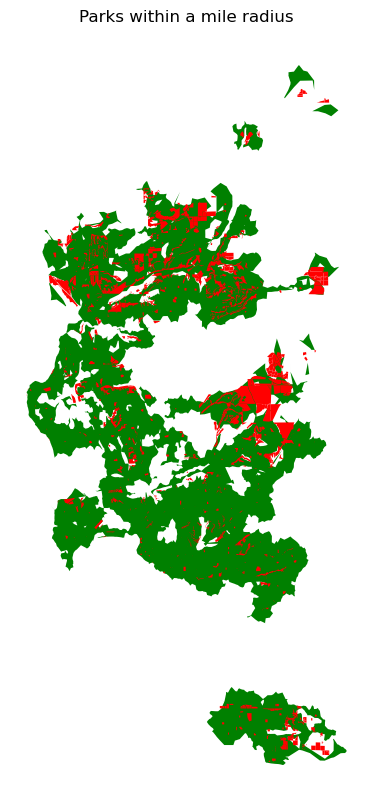

In [117]:
f, ax = plt.subplots(figsize=(12, 10))

pic.plot(color='green', ax=ax)

sdp.plot(ax=ax, color='red', markersize=5)

plt.title('Parks within a mile radius')

ax.axis('off')

plt.show()

### SD Places of Worship Isochrones

- ri_iso = isochrones_from_gdf(csdri, threshold=1600, network=sd_network)
- riid = ri_iso.dissolve()
- riid.to_file('./data/sd_worship/Isochrones/riid.shp')

In [118]:
riic_path = './data/sd_worship/Isochrones/riid.shp'

In [119]:
riic = gpd.read_file(riic_path, geometry='geometry')

riic.head()

,distance,geometry
0,1600,"MULTIPOLYGON (((-117.25726 32.72395, -117.2566..."


In [120]:
riic['worship_services'] = 1

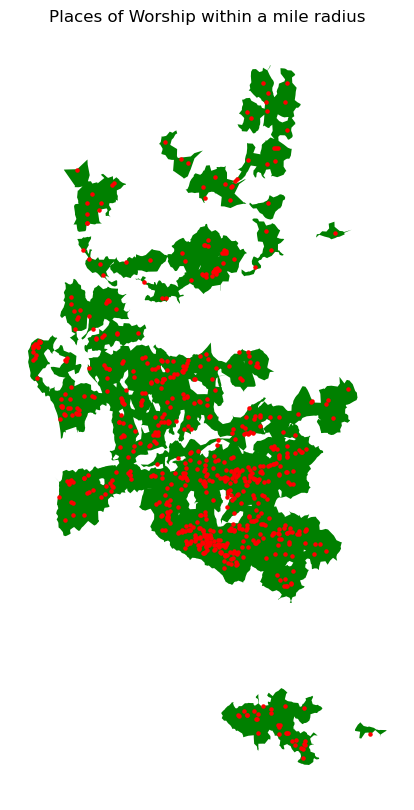

In [121]:
f, ax = plt.subplots(figsize=(12, 10))

riic.plot(color='green', ax=ax)

csdri.plot(ax=ax, color='red', markersize=5)

plt.title('Places of Worship within a mile radius')

ax.axis('off')

plt.show()

### Social Amenities

In [122]:
# sid['Schools'] + hid['Hospitals'] + bsic['Bus Stops'] + gsic['Grocery Stores'] + pic['Parks'] + riic['Places of Worship']

In [123]:
# iso_list = sid['Schools'] + hid['Hospitals'] + bsic['Bus Stops'] + gsic['Grocery Stores'] + pic['Parks'] + riic['Places of Worship']

In [124]:
# data = {
#     'Schools': sid['Schools'],
#     'Hospitals': hid['Hospitals'],
#     'Bus Stops': bsic['Bus Stops'],
#     'Grocery Stores': gsic['Grocery Stores'],
#     'Parks': pic['Parks'],
#     'Places of Worship': riic['Places of Worship']
# }

In [125]:
# Services['Total_Services'] = sid['Service_Count'] + hid['Service_Count'] + bsic['Service_Count'] + gsic['Service_Count'] + pic['Service_Count'] + riic['Service_Count']

In [126]:
intersection1 = gpd.overlay(sid, hid, how='intersection')

In [127]:
services = gpd.overlay(sid, hid, how='union')

In [128]:
csd_geom = csd[['geometry']]
csd_geom.head()

,geometry
0,"POLYGON ((-117.19471 32.75301, -117.19413 32.7..."
1,"POLYGON ((-117.17797 32.75765, -117.17706 32.7..."
2,"POLYGON ((-117.18383 32.74608, -117.18376 32.7..."
3,"POLYGON ((-117.16840 32.74897, -117.16768 32.7..."
4,"POLYGON ((-117.16400 32.74132, -117.16400 32.7..."


In [129]:
services = gpd.overlay(services, csd_geom, how='union')

In [130]:
intersection2 = gpd.overlay(pic, intersection1 , how='intersection')

In [131]:
services = gpd.overlay(services, csd_geom, how='union')

In [132]:
rename_column(bsic, old='distance', new='distance_transit')

In [133]:
intersection3 = gpd.overlay(bsic, intersection2, how='intersection')

In [134]:
services = gpd.overlay(intersection2, bsic, how='union')

In [135]:
services = gpd.overlay(services, csd_geom, how='union')

In [136]:
rename_column(gsic, old='distance', new='distance_grocery')

intersection4 = gpd.overlay(gsic, intersection3, how='intersection')

In [137]:
services = gpd.overlay(intersection3, gsic, how='union')

In [138]:
services = gpd.overlay(services, csd_geom, how='union')

In [139]:
rename_column(riic, old='distance', new='distance_worship')

intersection5 = gpd.overlay(riic, intersection4, how='intersection')

In [140]:
services = gpd.overlay(intersection4, riic, how='union')

In [141]:
services = gpd.overlay(services, csd_geom, how='union')

In [142]:
services = gpd.overlay(services, csd_geom, how='intersection')

In [143]:
within_boundary = gpd.overlay(intersection5, csd_geom, how='intersection')

In [144]:
services.fillna(0, inplace=True)

In [145]:
services['total_services'] = (
    services['busstop_services'].fillna(0) +
    services['park_services'].fillna(0) +
    services['hospital_services'].fillna(0) +
    services['school_services'].fillna(0) +
    services['grocerystore_services'].fillna(0)
)

In [146]:
services.head()

,distance_grocery,grocerystore_services,distance_transit,busstop_services,distance,park_services,distance_1,school_services,distance_2,hospital_services,distance_worship,worship_services,geometry,total_services
0,1600.0,1.0,1600.0,1.0,1600.0,1.0,1600.0,1.0,1600.0,1.0,1600.0,1.0,"POLYGON ((-117.19008 32.74982, -117.19019 32.7...",5.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1600.0,1.0,"MULTIPOLYGON (((-117.18565 32.75754, -117.1856...",0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1600.0,1.0,"POLYGON ((-117.17868 32.75488, -117.17868 32.7...",0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"POLYGON ((-117.18690 32.75881, -117.18682 32.7...",0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"POLYGON ((-117.17868 32.75488, -117.17881 32.7...",0.0


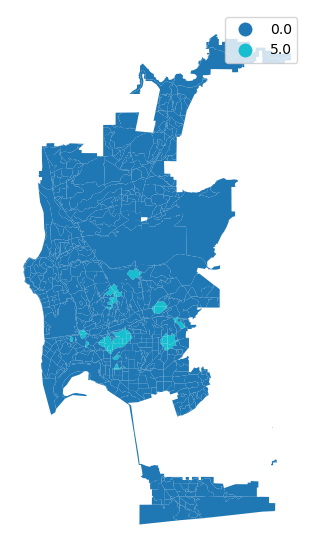

In [147]:
import matplotlib.pyplot as plt
f, ax = plt.subplots(1, figsize=(7, 7))
services.plot(
    column="total_services", categorical=True, legend=True, linewidth=0, ax=ax
)
ax.set_axis_off()
plt.show()